# What's Driving Electric Vehicle Sales? Analyzing and Predicting EV Sales 
#### Kayla Bauhaus | General Assembly Data Science | September 27, 2017

## Context
Battery-powered and plug-in car sales are still in their infancy. The Prius, a hybrid car, was released in 1999, and the first U.S. plug-in vehicles were released at the end of 2010. Some of these are considered Plug-in Hybrid Electric (PHEV), while others are pure electric vehicles, or PEVs. Since this is such a new industry, and there is an argument for putting cars on the road with reduced emissions, there is quite a bit of attention on where trends are headed.

Joann Zhou, an analyst at Argonne National Lab, has done a trend analysis that indicates that EVs are on track for growth that significantly outpaces hybrid vehicles. She performed this analysis by looking at vehicle sales since introduction. By counting 31 months forward for each, we can see that EVs are outselling hybrids by a factor of more than two to one.

In this analysis, I take a look at the data Argonne National Lab has collected on plug-in vehicles, from the first one (Chevrolet Volt) in Dec 2010, through Dec 2014 as more and more plug-in vehicles came on the market.

## Forecasts

There are many forecasts out there related to EVs:

- “Probably in 10 years, more than a half of new vehicle production is electric in the United States." Elon Musk 

- Morgan Stanley and Bloomberg predict EV sales will surpass combustion-engine car sales in 2040

- Wood MacKenzie as well as several clean tech bloggers have estimated this will happen in 20135

## Indicators

- The high unit cost of EVs relative to traditional vehicles is the most significant barrier, and EV cost itself is heavily reliant on battery technology advancements. The cost of lithium ion battery packs is falling much more rapidly than expected.

- Sales have also shown to be highly dependent on subsidies -- so the level of market penetration will also depend on government policies.

- A study on the Chinese EV market found that economic indicators highly correlated with automobile sales include *gross domestic product, consumer price index (CPI), interest rate, unemployment rate, and gas prices. In terms of EV specific indicators, they also used subsidies, range, charge point availability, emission rate, and reveue tax (Zhang et al. 2017).

- Peer reviewed articles have asserted that the cost of lithium-ion battery packs used in most EVs will need to drop below $150 before the cost of buying an EV will be on par with combustion engine cars on the market.


## Impact on other industries


- Gasoline: By 2035, Wood Mackenzie estimates that electric vehicles will account for at least 12 percent of new-car sales in the U.S., which represents 16 million vehicles. This base-case scenario would mean a reduction of gasoline demand by 350,000 barrels per day, a 5 percent reduction of today’s consumption. More aggressive adoption scenarios indicate a reduction of 1 million or even 2 million barrels per day.
- Power grid: In Europe and the U.S., EVs will account for 13% and 12% of electricity demand by 2040. While EV's represent a challenge to the power grid, introducing between 50-200 terawatt-hours of incremental power demand between now and 2035, when EV charging is managed in balance with generation from renewables, EV's will also help the system adapt to intermittent solar and wind.


### In summary:
1) *Electric vehicles will take majority share of new car sales*

We estimate that EVs will account for 54% of new car sales by 2040, not 35% as previously forecast.

2) *Tumbling battery prices are expected to drive EV growth*

The real take-off for EVs will happen in the second half of the 2020s due to plunging lithium-ion battery prices, which are set to fall by more than 70% by 2030.

3) *Oil displacement will ramp up*

By 2040, EVs will displace 8 million barrels of transport fuel per day, and add 5% to global electricity consumption.

4) *Electric vehicles will bolster electricity use*

In Europe and the U.S., EVs will account for 13% and 12% of electricity demand by 2040.  Charging EVs flexibly, when renewables are generating and wholesale prices are low, will help the system adapt to intermittent solar and wind.


## Today

- Chinese consumers bought about 289,000 in 2016, more purchases than any other market, according to Bloomberg New Energy Finance. Europeans purchased 215,000 and U.S. consumers bought 150,000. That’s compared with 92 million internal-combustion vehicles sold globally in 2016.

- U.S. consumers bought 150,000 EVs in 2016, compared to 17.6 million internal combustion vehicles in the U.S.

- A total of 16,503 plug-in vehicles (8,835 PEVs and 7,668 PHEVs) were sold during August 2017, up 6.5% over the sales in August 2016. PEVs captured 3.03% of total car sales in this month.

## Data

Monthly:
- PEV and PHEV sales by model from December 2010 to December 2014, as well as total EV sales and Total Car Sales information. This data is from Argonne National Lab.

- Nominal gas prices, real gas prices in September 2017 US dollars, as well as Consumer Price Index (CPI) from the US Energy Information Administration's (EIA) 'Short Term Energy Outlook'. Based on the EIA metadata, the CPI comes from the Burea of Labor Statistics.  

Annual:
- Clean Cities (US DOE program to cut petroleum use) Funding 2010-2016 from the Alternative Fuels Data Center (maintained by US Dept of Energy).
- Lithium-ion Battery Prices from 2010-2016 from Bloomberg New Energy Finance. Prices include cells plus battery packs.

Outcome: EV sales

Predictors: nominal and real gas prices, previous EV sales, CPI, Lithium-ion battery prices, Clean Cities Funding


## Hypotheses:

1) Li-ion battery prices are the best predictor of EV sales.

Method:
- correlation analysis
- chi^2 analysis -- correlation with EV sales by chance, or independent features?
- linear regression


2) Previous EV sales are a good predictor of future EV sales:

Method:
- Autocorrelation
- AR/ARMA/ARIMA




In [2]:
%matplotlib inline

import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
import numpy as np
import statsmodels.formula.api as smf
import sklearn.model_selection as sk



df = pd.read_csv('plug_in_cars.csv')
gas = pd.read_csv('monthly_gas_prices_dec10_dec14.csv')
battery_price = pd.read_csv('battery_price.csv')
cc_funding = pd.read_csv('total_clean_cities_funding.csv')
annual_master = pd.read_csv('annual_master.csv')
monthly_master = pd.read_csv('monthly_master.csv')
ev_totals = pd.read_csv('ev_totals.csv')
models = pd.read_csv('models.csv')


My monthly data frame contains total sales by plug-in car model from December 2010 (when plug-in cars first entered the market) to December 2014. I manually merged in the monthly Nominal Gas Price, Real Gas Price, and CPI data. I also entered Battery Price and Clean Cities Funding by taking the annual values, and offsetting them by a year. This is because a car sold in 2011 would have been manufactured with the 2010 battery price, and EV sales this year likely would have been influenced by last year's Clean Cities Funding, if there is a relationship there. I set each month to the same battery price for that calendar year, while I divided the annual Clean Cities Funding into 12 months, artificially saying that the annual values I have were distributed equally across each month.

In [3]:
monthly_master.head()

,Month,Chevrolet Volt,Prius PHEV,Ford C-Max Energi,Honda Accord,Ford Fusion Energi,Porsche Cayenne S E-Hybrid,Porsche Panamera S E-Hybrid,BMW i3,BMW i8,...,VW e Golf,Total PEV,Total PHEV,Total,Percent of Car Sales,Index (1982-84=1),Nominal Motor Gasoline Price,Real Motor Gasoline Price,Battery Price,Clean Cities Funding
0,1-Dec-10,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19,326,345,0.06%,2.205,2.99,3.33,1000,48.158333
1,1-Jan-11,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,103,321,424,0.10%,2.212,3.09,3.43,1000,48.158333
2,1-Feb-11,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83,281,364,0.07%,2.219,3.21,3.55,1000,48.158333
3,1-Mar-11,608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,298,608,906,0.13%,2.230,3.56,3.92,1000,48.158333
4,1-Apr-11,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,573,493,1066,0.17%,2.241,3.80,4.16,1000,48.158333


In [4]:
#rename some columns, and create index on the Date column 
monthly_master.rename(columns={'Month':'Date'}, inplace=True)
monthly_master.rename(columns={'Index (1982-84=1)':'CPI'}, inplace=True)
monthly_master.rename(columns={'Nominal Motor Gasoline Price ':'Nominal Gas Price'}, inplace=True)
monthly_master.rename(columns={'Real Motor Gasoline Price ':'Real Gas Price'}, inplace=True)
monthly_master.rename(columns={'Prius PHEV':'Toyota Prius PHEV'}, inplace=True)

monthly_master['Date'] = pd.to_datetime(monthly_master['Date'])
monthly_master.set_index('Date', inplace=True, drop=False)
monthly_master.head()

,Date,Chevrolet Volt,Toyota Prius PHEV,Ford C-Max Energi,Honda Accord,Ford Fusion Energi,Porsche Cayenne S E-Hybrid,Porsche Panamera S E-Hybrid,BMW i3,BMW i8,...,VW e Golf,Total PEV,Total PHEV,Total,Percent of Car Sales,CPI,Nominal Gas Price,Real Gas Price,Battery Price,Clean Cities Funding
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-01,2010-12-01,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19,326,345,0.06%,2.205,2.99,3.33,1000,48.158333
2011-01-01,2011-01-01,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,103,321,424,0.10%,2.212,3.09,3.43,1000,48.158333
2011-02-01,2011-02-01,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83,281,364,0.07%,2.219,3.21,3.55,1000,48.158333
2011-03-01,2011-03-01,608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,298,608,906,0.13%,2.230,3.56,3.92,1000,48.158333
2011-04-01,2011-04-01,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,573,493,1066,0.17%,2.241,3.80,4.16,1000,48.158333


In [5]:
#turn Nans into zeros for monthly EV sales
monthly_master = monthly_master.fillna(0)
monthly_master.head()

,Date,Chevrolet Volt,Toyota Prius PHEV,Ford C-Max Energi,Honda Accord,Ford Fusion Energi,Porsche Cayenne S E-Hybrid,Porsche Panamera S E-Hybrid,BMW i3,BMW i8,...,VW e Golf,Total PEV,Total PHEV,Total,Percent of Car Sales,CPI,Nominal Gas Price,Real Gas Price,Battery Price,Clean Cities Funding
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-01,2010-12-01,326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19,326,345,0.06%,2.205,2.99,3.33,1000,48.158333
2011-01-01,2011-01-01,321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,103,321,424,0.10%,2.212,3.09,3.43,1000,48.158333
2011-02-01,2011-02-01,281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,83,281,364,0.07%,2.219,3.21,3.55,1000,48.158333
2011-03-01,2011-03-01,608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,298,608,906,0.13%,2.230,3.56,3.92,1000,48.158333
2011-04-01,2011-04-01,493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,573,493,1066,0.17%,2.241,3.80,4.16,1000,48.158333


In [6]:
monthly_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2010-12-01 to 2014-12-01
Data columns (total 33 columns):
Date                           49 non-null datetime64[ns]
Chevrolet Volt                 49 non-null int64
Toyota Prius PHEV              49 non-null float64
Ford C-Max Energi              49 non-null float64
Honda Accord                   49 non-null float64
Ford Fusion Energi             49 non-null float64
Porsche Cayenne S E-Hybrid     49 non-null float64
Porsche Panamera S E-Hybrid    49 non-null float64
BMW i3                         49 non-null float64
BMW i8                         49 non-null float64
Cadillac ELR                   49 non-null float64
Nissan Leaf                    49 non-null int64
Mercedes Benz Smart ED         49 non-null int64
Mitsubishi I EV                49 non-null float64
BMW Active E                   49 non-null float64
Ford Focus                     49 non-null float64
Honda Fit EV                   49 non-null float64
Tesla Mod

In [7]:
cols_to_keep = ['Date','Total PEV', 'Total PHEV', 'Total', 'Percent of Car Sales', 'CPI', 'Nominal Gas Price', 'Real Gas Price', 'Battery Price', 'Clean Cities Funding']
data = monthly_master[cols_to_keep]
data.head()


,Date,Total PEV,Total PHEV,Total,Percent of Car Sales,CPI,Nominal Gas Price,Real Gas Price,Battery Price,Clean Cities Funding
Date,,,,,,,,,,
2010-12-01,2010-12-01,19,326,345,0.06%,2.205,2.99,3.33,1000,48.158333
2011-01-01,2011-01-01,103,321,424,0.10%,2.212,3.09,3.43,1000,48.158333
2011-02-01,2011-02-01,83,281,364,0.07%,2.219,3.21,3.55,1000,48.158333
2011-03-01,2011-03-01,298,608,906,0.13%,2.230,3.56,3.92,1000,48.158333
2011-04-01,2011-04-01,573,493,1066,0.17%,2.241,3.80,4.16,1000,48.158333


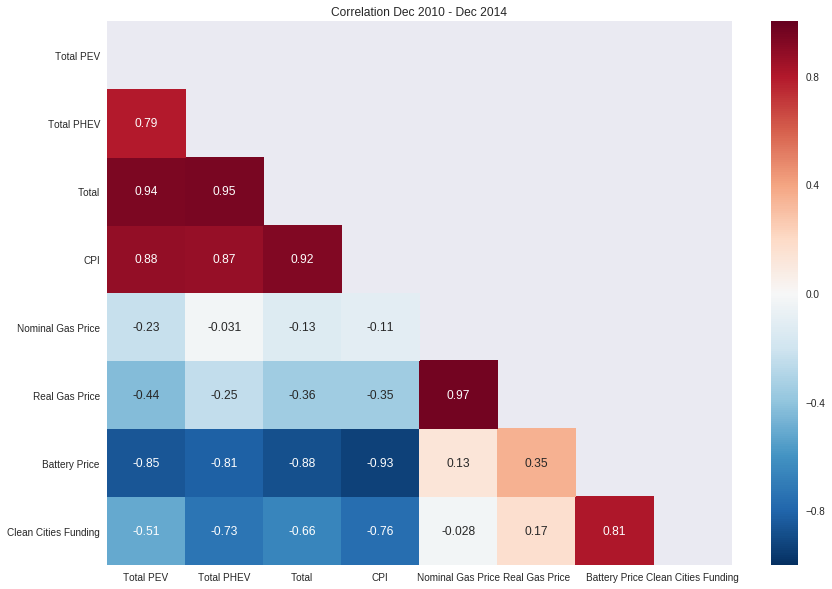

In [8]:
fig, ax = plt.subplots(figsize=[14,10])
# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#correlation Dec 2010 - Dec 2014 
sns_plot = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.title('Correlation Dec 2010 - Dec 2014')

sns_plot.figure.savefig("correlation_all.png")

Above we see:
- High positive correlation between CPI and 'Total' EV sales
- High negative correlation between Battery Price and 'Total' EV sales, as hypothesized
- Surprisingly, a slight negative correlation between Clean Cities Funding and 'Total' EV sales. Perhaps the funding was largely given to projects that were unrelated to public sales of EV's -- perhaps more funding was devoted to public sector fleets, or went toward supporting other Alternative Fuel vehicles such as biofuels instead of electric
- I also did not expect a slight negative correlation between gas prices and 'Total' EV sales, but perhaps there is a lag -- when there are a few months of high gas prices, it might take a few months for people to consider, then act upon, buying an EV

In [9]:
#Yearly dataframes
df_2011 = monthly_master['2011']
df_2012 = monthly_master['2012']
df_2013 = monthly_master['2013']
df_2014 = monthly_master['2014']

In [10]:
#By Quarter

df_Q1_2011 = monthly_master['2011-01-01' : '2011-03-31']
df_Q2_2011 = monthly_master['2011-04-01' : '2011-06-30']
df_Q3_2011 = monthly_master['2011-07-01' : '2011-09-30']
df_Q4_2011 = monthly_master['2011-10-01' : '2011-12-31']

df_Q1_2012 = monthly_master['2012-01-01' : '2012-03-31']
df_Q2_2012 = monthly_master['2012-04-01' : '2012-06-30']
df_Q3_2012 = monthly_master['2012-07-01' : '2012-09-30']
df_Q4_2012 = monthly_master['2012-10-01' : '2012-12-31']

df_Q1_2013 = monthly_master['2013-01-01' : '2013-03-31']
df_Q2_2013 = monthly_master['2013-04-01' : '2013-06-30']
df_Q3_2013 = monthly_master['2013-07-01' : '2013-09-30']
df_Q4_2013 = monthly_master['2013-10-01' : '2013-12-31']

df_Q1_2014 = monthly_master['2014-01-01' : '2014-03-31']
df_Q2_2014 = monthly_master['2014-04-01' : '2014-06-30']
df_Q3_2014 = monthly_master['2014-07-01' : '2014-09-30']
df_Q4_2014 = monthly_master['2014-10-01' : '2014-12-31']


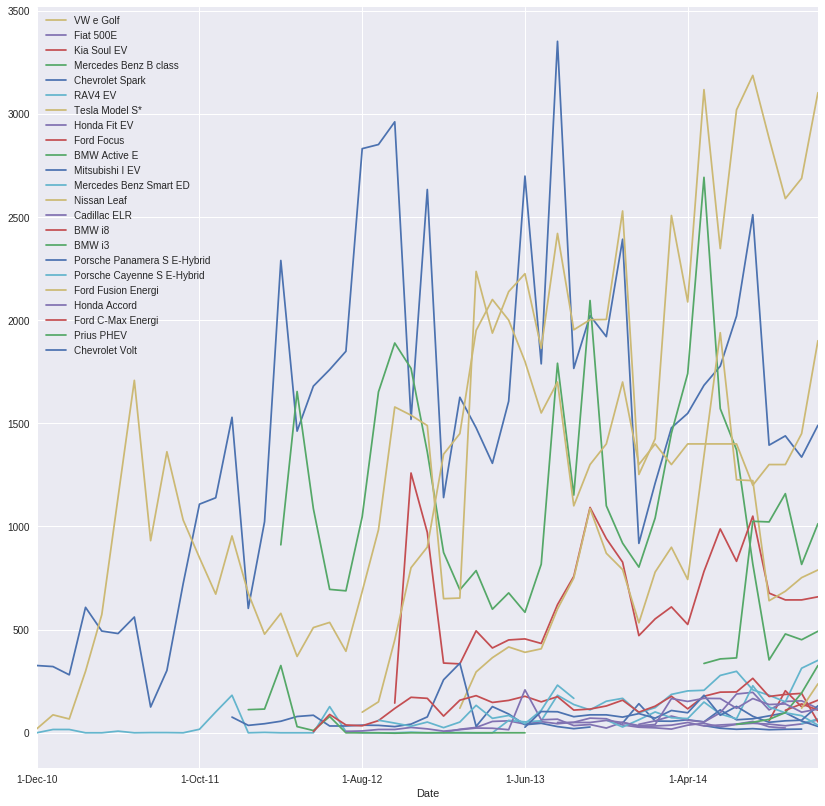

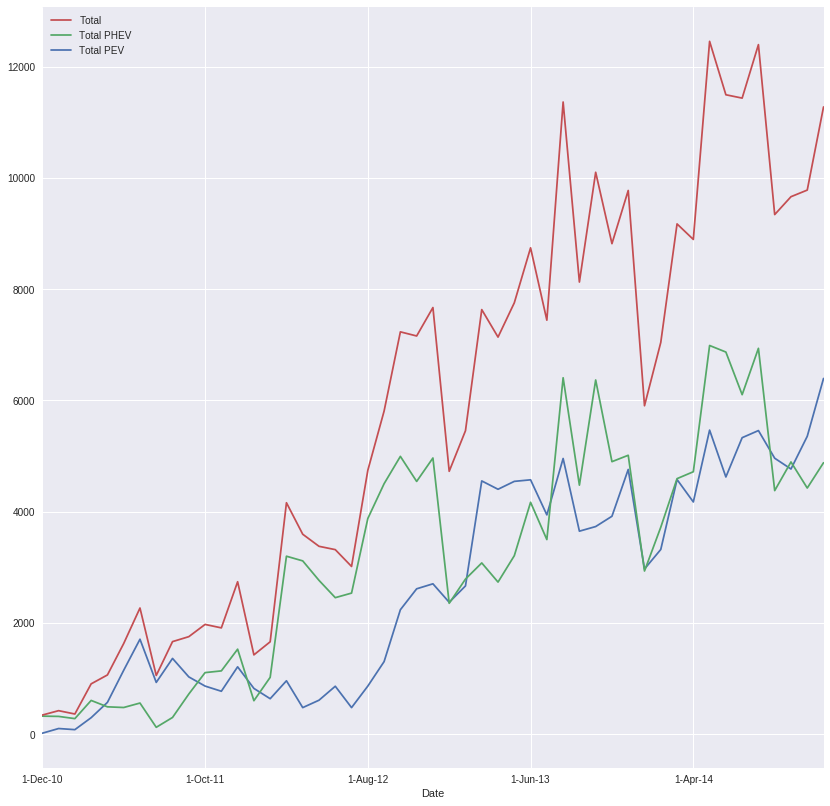

In [11]:
models.plot(x = 'Date', figsize = (14, 14), legend = 'reverse')
ev_totals.plot(x = 'Date', figsize = (14, 14), legend = 'reverse')


Below I plotted just 2011 data, and below that I included a visualization of gas prices with a scale such that we can see the trend. We saw a negative correlation between gas prices and EV sales, so here we can see a delay between when gas prices are high, then a month or two later, EV sales go up.

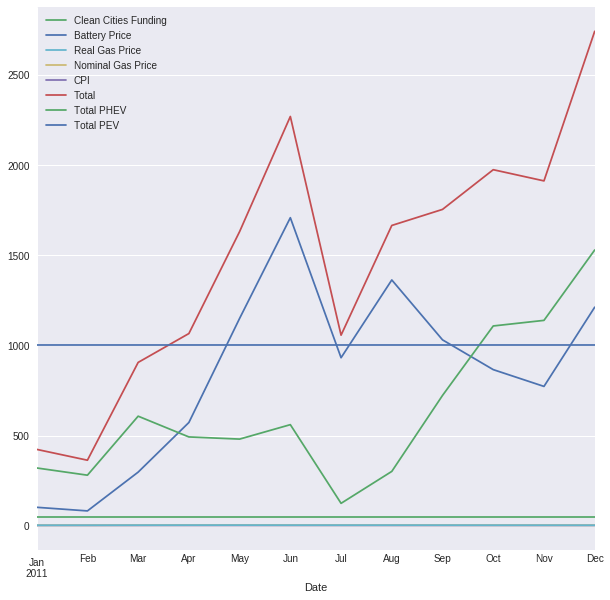

In [12]:
#View just 2011

data_2011 = data['2011']
data_2012 = data['2012']
data_2013 = data['2013']
data_2014 = data['2014']
gas.rename(columns={'Index (1982-84=1)':'CPI'}, inplace=True)
gas['Date'] = pd.to_datetime(gas['Month'])
gas.set_index('Date', inplace=True, drop=False)

data_2011.plot( figsize = (10, 10), legend = 'reverse')

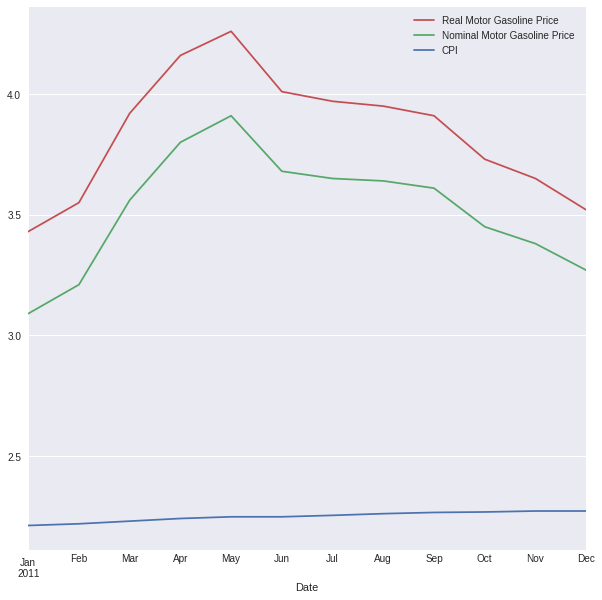

In [13]:
#Gas prices in 2011
gas_2011 = gas['2011']
gas_2011.plot( figsize = (10, 10), legend = 'reverse')

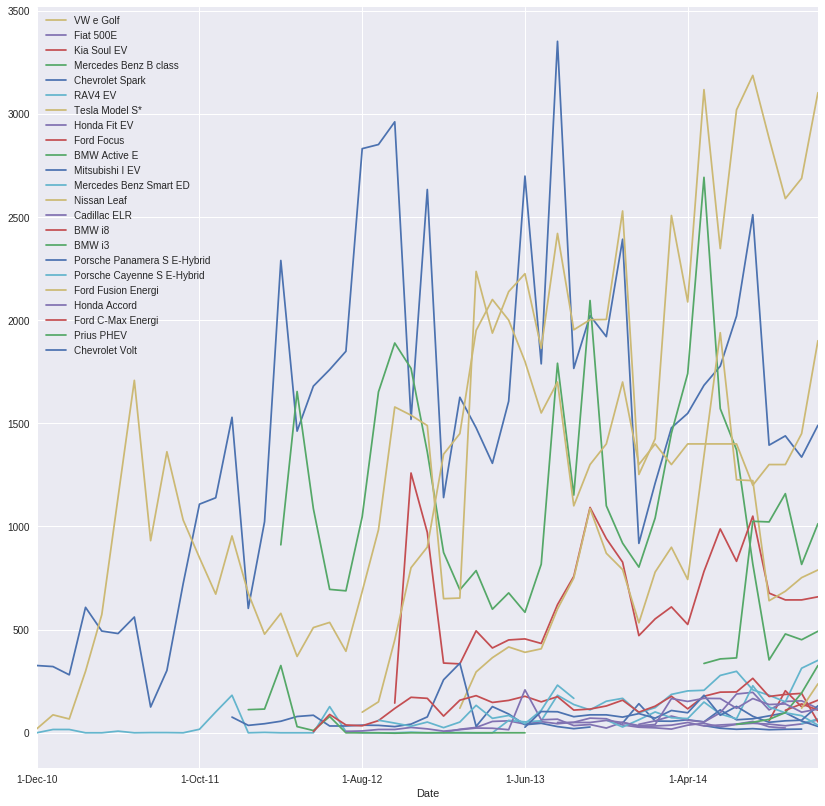

In [14]:
models.plot(x = 'Date', figsize = (14, 14), legend = 'reverse')

Bimodal distribution indicates total EV sales in the US between 2011 and 2014 were most often either around 2500 each month or around 7500 each month:

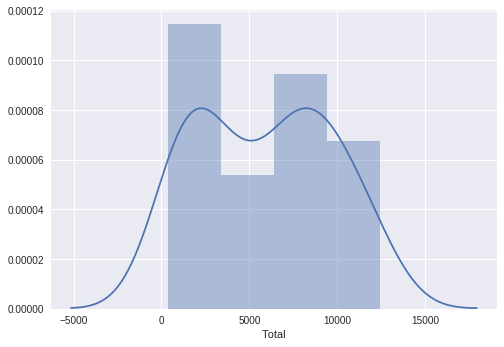

In [15]:
sns.distplot(monthly_master['Total'])


# Using my first hypothesis as a guide, I will use Linear Regression to find which features may be best predictors of EV sales:


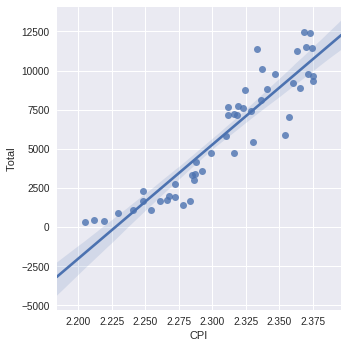

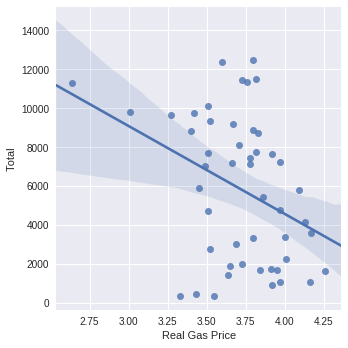

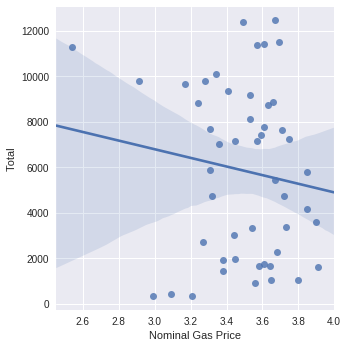

In [16]:
#Visualize the scatterplots to understand the relationship between features
sns.lmplot('CPI', 'Total', data)
sns.lmplot('Real Gas Price', 'Total', data)
sns.lmplot('Nominal Gas Price', 'Total', data)


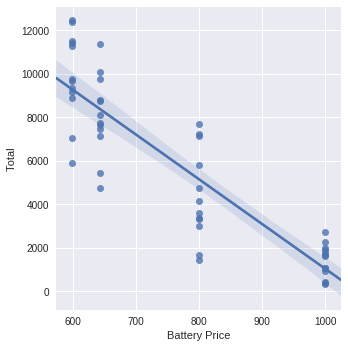

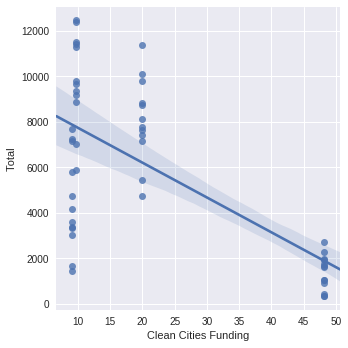

In [17]:
sns.lmplot('Battery Price', 'Total', data)
sns.lmplot('Clean Cities Funding', 'Total', data)

In [18]:
X = monthly_master[['Battery Price']]
y = monthly_master['Total']

lm = smf.ols(formula='y ~ X', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     160.3
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           9.32e-17
Time:                        17:12:28   Log-Likelihood:                -436.10
No. Observations:                  49   AIC:                             876.2
Df Residuals:                      47   BIC:                             880.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.159e+04   1268.931     17.015      0.000     1.9e+04    2.41e+04
X            -20.5580      1.624    -12.662      0.000     -23.824     -17.292
==============================================================================
Omnibus:                        1.061   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                1.113
Skew:                          -0.292   Prob(JB):                        0.573
Kurtosis:                       2.549   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X = monthly_master[['Clean Cities Funding']]
y = monthly_master['Total']

lm = smf.ols(formula='y ~ X', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     36.89
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           2.08e-07
Time:                        17:12:29   Log-Likelihood:                -458.27
No. Observations:                  49   AIC:                             920.5
Df Residuals:                      47   BIC:                             924.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9271.7062    693.426     13.371      0.000    7876.713    1.07e+04
X           -153.1943     25.222     -6.074      0.000    -203.934    -102.455
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   0.457
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                1.080
Skew:                          -0.326   Prob(JB):                        0.583
Kurtosis:                       2.677   Cond. No.                         46.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X = monthly_master[['CPI']]
y = monthly_master['Total']

lm = smf.ols(formula='y ~ X', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     277.9
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           2.31e-21
Time:                        17:12:29   Log-Likelihood:                -425.09
No. Observations:                  49   AIC:                             854.2
Df Residuals:                      47   BIC:                             858.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.625e+05   1.01e+04    -16.087      0.000   -1.83e+05   -1.42e+05
X           7.292e+04   4374.219     16.671      0.000    6.41e+04    8.17e+04
==============================================================================
Omnibus:                        0.034   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.171
Skew:                           0.054   Prob(JB):                        0.918
Kurtosis:                       2.732   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CPI, Battery Price, and Clean Cities Funding have the highest R-squared values

### To understand whether the relationship between these features and EV sales is by chance or not, I look at chi-squared:

In [21]:
x_col = ['CPI', 'Nominal Gas Price', 'Real Gas Price', 'Battery Price', 'Clean Cities Funding']
X = monthly_master[x_col]
X.head()

,CPI,Nominal Gas Price,Real Gas Price,Battery Price,Clean Cities Funding
Date,,,,,
2010-12-01,2.205,2.99,3.33,1000,48.158333
2011-01-01,2.212,3.09,3.43,1000,48.158333
2011-02-01,2.219,3.21,3.55,1000,48.158333
2011-03-01,2.230,3.56,3.92,1000,48.158333
2011-04-01,2.241,3.80,4.16,1000,48.158333


[  4.74100016e-02   9.74044990e-01   1.15937679e+00   1.62694324e+03
   5.72583032e+02]


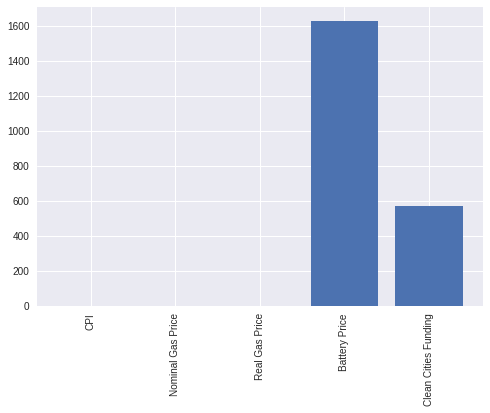

In [42]:
#which variables are by chance / include a high degree of randomness

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2


y_col = ['Total']
x_col = ['CPI', 'Nominal Gas Price', 'Real Gas Price', 'Battery Price', 'Clean Cities Funding']

# '% of Car Sales', 
y = monthly_master[y_col]
X = monthly_master[x_col]

# Perform feature selection
selector = SelectKBest(chi2, k='all')
selector.fit(X, y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = selector.scores_
print scores

# Plot the scores.
plt.bar(range(len(x_col)), scores)
plt.xticks(range(len(x_col)), x_col, rotation='vertical')
plt.show()

[ 0.04741     0.97404499  1.15937679]


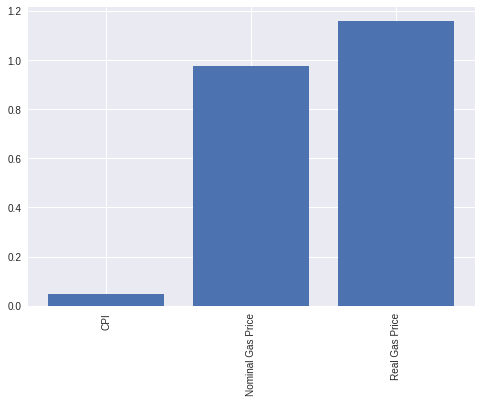

In [23]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2


y_col = ['Total']
x_col = ['CPI', 'Nominal Gas Price', 'Real Gas Price']

# '% of Car Sales', 
y = monthly_master[y_col]
X = monthly_master[x_col]

# Perform feature selection
selector = SelectKBest(chi2, k='all')
selector.fit(X, y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = selector.scores_
print scores

# Plot the scores.  
plt.bar(range(len(x_col)), scores)
plt.xticks(range(len(x_col)), x_col, rotation='vertical')
plt.show()

## So, while battery price is highly negatively correlated with EV sales, it has a high degree of randomness according to this dataset. However, CPI is both highly correlated with EV sales AND it appears to be a more reliable preidctor as the relationship is less likely to be by chance.

# Now, I will move on to time series analysis & modeling for my second hypothesis:

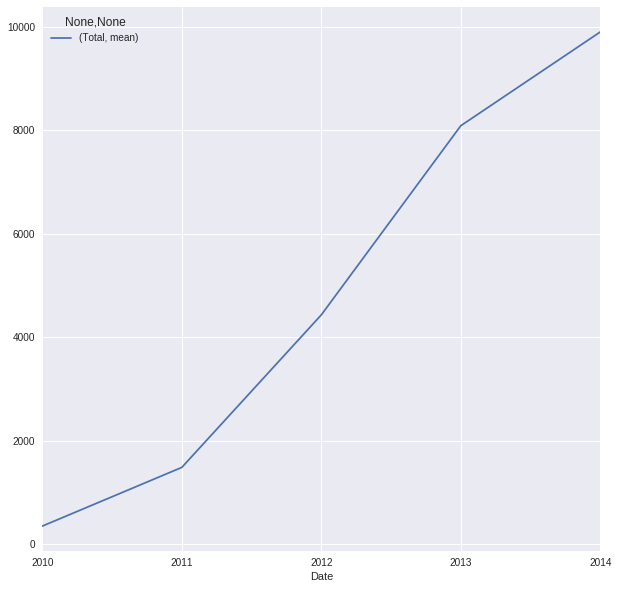

In [43]:
#resample annually just to see what the trend looks like
yearly_master = monthly_master[['Total']].resample('AS').apply(['mean'])
yearly_master.plot(figsize = (10, 10))

In [26]:
data.Total.autocorr(lag=1) 

0.91332511725170429

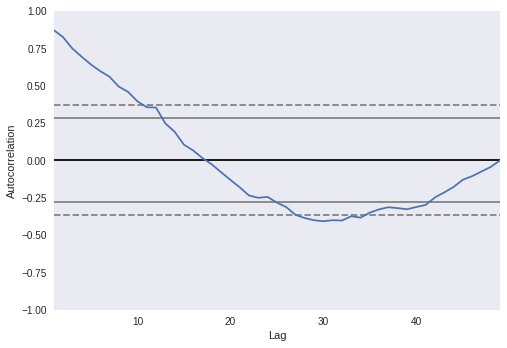

In [48]:
autocorrelation_plot(data.Total)

In the above autocorrelation plot, we can see that the highest correlation is between last month's EV sales and this month's. It is highest at one month back. There is a slight increase in autocorrelation at 12 months back, indicating a slight cyclical pattern of EV sales on a yearly basis.

We do not see random spikes, so there is not much need for a moving average model which would smooth out spikes.

Instead, I took a closer look at the autocorrelations stepping back one month at a time using a helpful function from scikit learn:

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


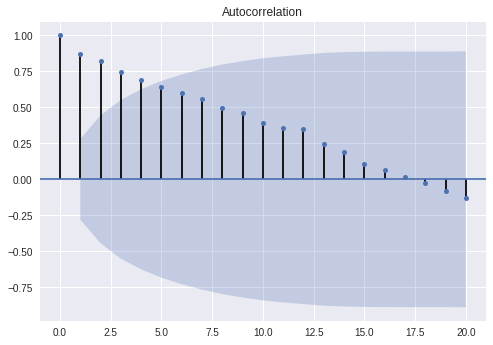

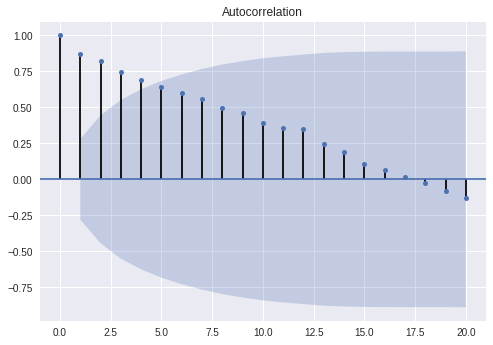

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.Total, lags=20)

We can fit an Autoregressive (AR) model to use previous EV sales to fit a model to later EV sales. We do not need to use Moving Average, so I have set q = 0.


In [29]:
from statsmodels.tsa.arima_model import ARMA

ev_sales_data = data[['Total']].astype(float)
model = ARMA(ev_sales_data, (1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                   49
Model:                     ARMA(1, 0)   Log Likelihood                -429.761
Method:                       css-mle   S.D. of innovations           1527.397
Date:                Fri, 29 Sep 2017   AIC                            865.522
Time:                        17:12:40   BIC                            871.197
Sample:                    12-01-2010   HQIC                           867.675
                         - 12-01-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5869.2208   2499.237      2.348      0.023     970.807    1.08e+04
ar.L1.Total     0.9296      0.052     17.765      0.000       0.827       1.032
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0757           +0.0000j            1.0757            0.0000
-----------------------------------------------------------------------------
"""


In the above AR(1) model, which looks back one month from each data point, we can see an intercept value indicating base sales, and we also get a 'beta' coefficient that tells us how to include the latest sales value. 

The coefficient (0.9296) is slightly larger than our autocorrelation telling us we have a trend -- that this is non-stationary data. This summary tells us that to calculate this month's sales from last month's, we add an intercept of 5869 to 0.93 times the previous month’s sales. 

Because the P>|z| is very very small, I don't want to reject the hypothesis that there is no correlation between sales today and sales last month

Then, I increased the complexity of our model to learn two coefficients, which will tell us the effect of the last two EV sales values on the current sales:

In [30]:
A2_model = ARMA(ev_sales_data, (2, 0)).fit()
A2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                   49
Model:                     ARMA(2, 0)   Log Likelihood                -425.942
Method:                       css-mle   S.D. of innovations           1406.110
Date:                Fri, 29 Sep 2017   AIC                            859.883
Time:                        17:12:43   BIC                            867.451
Sample:                    12-01-2010   HQIC                           862.754
                         - 12-01-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5721.7022   3434.250      1.666      0.102   -1009.305    1.25e+04
ar.L1.Total     0.5762      0.131      4.408      0.000       0.320       0.832
ar.L2.Total     0.3866      0.133      2.908      0.006       0.126       0.647
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0273           +0.0000j            1.0273            0.0000
AR.2           -2.5177           +0.0000j            2.5177            0.5000
-----------------------------------------------------------------------------
"""

I plotted the residual errors to find out how off the model's predictions are:

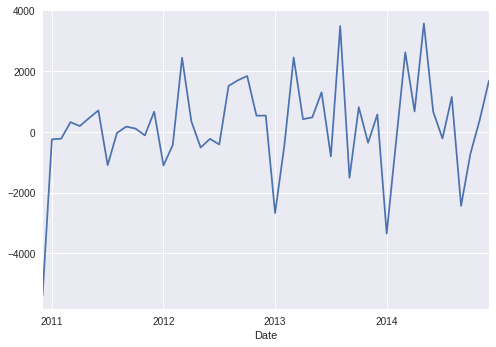

In [31]:
A2_model.resid.plot()

Ideally, we want randomly distributed risiduals, not large errrors. Below I've plotted the autocorrelations of the residuals. We'd like these to be near 0 and appear to be random:


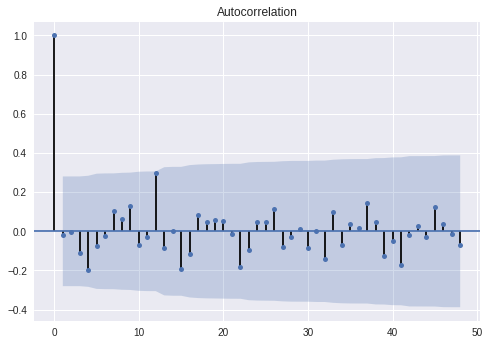

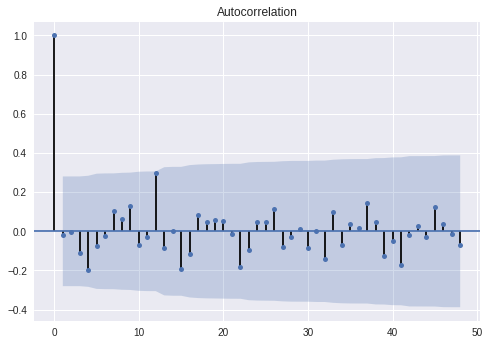

In [50]:
plot_acf(A2_model.resid, lags=48)

We can see that there is a bit of a cyclical patern to the residuals, but they are relatively close to zero.

To expand this AR model to an ARMA model, we can include the moving average component as well.

In [33]:
ARMA_model = ARMA(ev_sales_data, (1, 1)).fit()
ARMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                   49
Model:                     ARMA(1, 1)   Log Likelihood                -426.409
Method:                       css-mle   S.D. of innovations           1419.439
Date:                Fri, 29 Sep 2017   AIC                            860.817
Time:                        17:12:48   BIC                            868.384
Sample:                    12-01-2010   HQIC                           863.688
                         - 12-01-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5669.2575   3699.177      1.533      0.132   -1580.997    1.29e+04
ar.L1.Total     0.9808      0.024     40.391      0.000       0.933       1.028
ma.L1.Total    -0.3868      0.142     -2.716      0.009      -0.666      -0.108
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0196           +0.0000j            1.0196            0.0000
MA.1            2.5852           +0.0000j            2.5852            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
from statsmodels.tsa.arima_model import ARIMA
ARIMA_model = ARIMA(ev_sales_data, (1, 0, 1)).fit()
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                   49
Model:                     ARMA(1, 1)   Log Likelihood                -426.409
Method:                       css-mle   S.D. of innovations           1419.439
Date:                Fri, 29 Sep 2017   AIC                            860.817
Time:                        17:12:48   BIC                            868.384
Sample:                    12-01-2010   HQIC                           863.688
                         - 12-01-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5669.2575   3699.177      1.533      0.132   -1580.997    1.29e+04
ar.L1.Total     0.9808      0.024     40.391      0.000       0.933       1.028
ma.L1.Total    -0.3868      0.142     -2.716      0.009      -0.666      -0.108
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0196           +0.0000j            1.0196            0.0000
MA.1            2.5852           +0.0000j            2.5852            0.0000
-----------------------------------------------------------------------------
"""

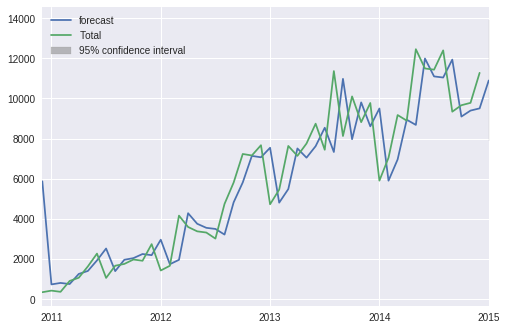

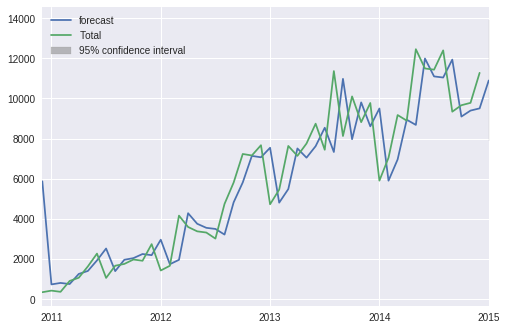

In [52]:
model.plot_predict(0, 49)

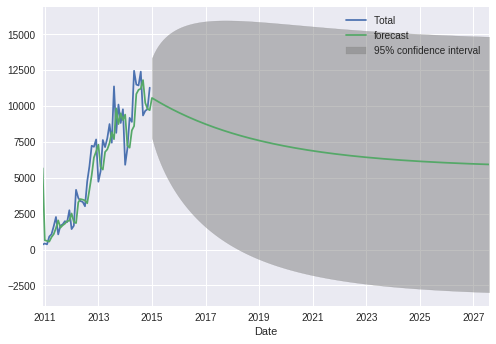

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = ev_sales_data.plot(ax=ax)
fig = ARIMA_model.plot_predict(0, 200, ax=ax, plot_insample=False)


# What worked / What didn't

Data Quality and completeness had a large impact on my ability to learn an accurate model. Based on correlation, it is clear that Battery Price does have a high correlation with Total EV Sales, however with the 'interpolated' monthly data from annual data points, the correlation appears to have a high degree of chance/randomness. Similarly, the monthly data had a fair amount of noise that impacted the ability of the ARIMA model to predict EV sales out into the future. Regularization may be helpful in future iterations.



# Conclusion & Next Steps
Based on the data that I have access to, I can confirm that there is a high correlation between lithium ion battery cost and EV sales, as well as between CPI and EV sales. CPI has been a confirmed predictor of EV sales in other studies, and it also appeared to be the most trustworthy predictor since it had the lowest chi^2 value.

Still to be determined / Next Steps:

- While I looked at which features may be the best predictors of EV sales, I could look at multiple models to find the best model
- I have additional data on EV-related laws and incentives, which I did not take advantage of in this project. Potential next steps with this data could be to classify the text of each law/incentive as 'positive' or 'negative', and consider that classification as a predictor of EV sales when that law went into effect
- I also have specifications for each of the PHEV and PEV models, so I could look at which car features may drive more sales
- I would be interested, given access to more granular lithium ion battery price data, to predict the year or even month at which the price of lithium ion battery packs for electric vehicle manufacturing will fall below $150, and perhaps from there extrapolate out when Electric Vehicle sales will account for 50 percent of all car sales.
- I would also like to look at this data at a regional level, but did not have access to this geographic granularity


# Sources
- https://www.afdc.energy.gov/data/
- https://www.eia.gov/outlooks/steo/realprices/
- https://about.bnef.com/blog/lithium-ion-battery-costs-squeezed-margins-new-business-models/
- https://energy.gov/articles/ev-sales-skyrocketing-egallon-holds-steady
- http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0176729#sec006
- http://www.nature.com/nclimate/journal/v5/n4/abs/nclimate2564.html?foxtrotcallback=true
- https://www.teslarati.com/elon-musk-50-new-cars-will-electric-10-years-no-steering-wheel-20-years/
- https://electrek.co/2017/05/05/electric-vehicle-sales-vs-gas-2040/
- https://data.bloomberglp.com/bnef/sites/14/2017/07/EVforecastsataglance1.png
- https://www.sei-international.org/mediamanager/documents/Publications/SEI-Nature-pre-pub-2015-falling-costs-battery-packs-BEVs.pdf
- https://www.woodmac.com/analysis/2035-electric-vehicles
- https://about.bnef.com/electric-vehicle-outlook/
- https://about.bnef.com/new-energy-outlook/
- https://www.greentechmedia.com/articles/read/Wood-Mackenzie-EVs-Will-Reduce-US-Gasoline-Demand-by-300000-Barrels-Per-D
- https://www.energy.gov/sites/prod/files/2017/06/f34/Challenges_and_Opportunities_of_Grid_Modernization_and_Electric_Transportation.pdf
- https://about.bnef.com/blog/why-electric-cars-are-everywhere-except-here-now-quicktake-qa/
- http://www.anl.gov/energy-systems/project/light-duty-electric-drive-vehicles-monthly-sales-updates

# Acknowledgements 

## Thank you Nate, Greg, Vinod, GA, and everyone in this class!! :)

